# build a Mastertable

In [1]:
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import pytesseract

## merge images and text file 

In [2]:
import os
from PIL import Image
import pandas as pd

image_folder_path = "SROIE2019/test/img"
text_folder_path = "SROIE2019/test/entities"


data = {'Image Name': [], 'Text File Name': []}

# Iterate through the files in the image folder
for image_filename in os.listdir(image_folder_path):
    # Check if the file is an image
    if image_filename.lower().endswith('.jpg'):
     
        text_filename = os.path.splitext(image_filename)[0] + '.txt'
        text_file_path = os.path.join(text_folder_path, text_filename)
            
          
    data['Image Name'].append(image_filename)
    data['Text File Name'].append(text_filename)



df_train = pd.DataFrame(data)


print(df_train)


           Image Name    Text File Name
0    X51005663300.jpg  X51005663300.txt
1    X51006619842.jpg  X51006619842.txt
2    X51006350737.jpg  X51006350737.txt
3    X51005605287.jpg  X51005605287.txt
4    X51007339127.jpg  X51007339127.txt
..                ...               ...
342  X51005757282.jpg  X51005757282.txt
343  X51007103597.jpg  X51007103597.txt
344  X51006556851.jpg  X51006556851.txt
345  X51005444044.jpg  X51005444044.txt
346  X51006647933.jpg  X51006647933.txt

[347 rows x 2 columns]


In [3]:
df_train.dtypes


Image Name        object
Text File Name    object
dtype: object

## Extract features (company, date, address, total) from Json file and merge them in  the dataframe

In [4]:
import os
import json

origin_path_entities = "SROIE2019/test/entities"  

for i, file_path in enumerate(df_train["Text File Name"]):
    full_file_path = os.path.join(origin_path_entities, file_path)  
    
    with open(full_file_path, 'r') as json_file:
        json_content = json.load(json_file)

    df_train.at[i, 'company'] = json_content["company"]
    df_train.at[i, 'date'] = json_content["date"]
    df_train.at[i, 'address'] = json_content["address"]
    df_train.at[i, 'total'] = json_content["total"]

df_train.head(7)


,Image Name,Text File Name,company,date,address,total
0,X51005663300.jpg,X51005663300.txt,LIM SENG THO HARDWARE TRADING,02/02/2018,"NO 7, SIMPANG OFF BATU VILLAGE, JALAN IPOH BAT...",7.00
1,X51006619842.jpg,X51006619842.txt,YIN MA (M) SDN.BHD.,03 JUN 2016,"NO.2, JALAN UDANG SIAR 2, TAMAN SRI SEGAMBUT, ...",32.70
2,X51006350737.jpg,X51006350737.txt,C W KHOO HARDWARE SDN BHD,31/03/2018,"NO.50 , JALAN PBS 14/11 , KAWASAN PERINDUSTRIA...",14.65
3,X51005605287.jpg,X51005605287.txt,AEON CO. (M) BHD,14/03/2018,"3RD FLR, AEON TAMAN MALURI SC JLN JEJAKA, TAMA...",12.25
4,X51007339127.jpg,X51007339127.txt,SANYU STATIONERY SHOP,24/10/2017,"NO. 31G&33G, JALAN SETIA INDAH X ,U13/X 40170 ...",3.00
5,X51005719889.jpg,X51005719889.txt,HENG KEE DELIGHTS BAK KUT TEH.,04/01/2018,"NO31 , JALAN 3/62A , BANDAR MENJALARA KEPONG. ...",42.00
6,X51006555819.jpg,X51006555819.txt,GARDENIA BAKERIES (KL) SDN BHD,23/07/2017,"LOT 3, JALAN PELABUR 23/1, 40300 SHAH ALAM, SE...",26.58


In [5]:
df_train.dtypes

Image Name        object
Text File Name    object
company           object
date              object
address           object
total             object
dtype: object

In [6]:
df_train["date"] = pd.to_datetime(df_train['date'])
import re 
df_train['total'] = df_train['total'].str.replace('$', '')
df_train['total'] = df_train['total'].str.replace('[A-Za-z]', '')
df_train["total"] = df_train["total"].astype(float)

/var/folders/jg/pktw8l5s32xgj2428mt_gdxr0000gn/T/ipykernel_21483/221953544.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_train["date"] = pd.to_datetime(df_train['date'])
/var/folders/jg/pktw8l5s32xgj2428mt_gdxr0000gn/T/ipykernel_21483/221953544.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_train['total'] = df_train['total'].str.replace('$', '')
/var/folders/jg/pktw8l5s32xgj2428mt_gdxr0000gn/T/ipykernel_21483/221953544.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['total'] = df_train['total'].str.replace('[A-Za-z]', '')


In [7]:
df_train.dtypes

Image Name                object
Text File Name            object
company                   object
date              datetime64[ns]
address                   object
total                    float64
dtype: object

In [8]:
df_train.head(5)

,Image Name,Text File Name,company,date,address,total
0,X51005663300.jpg,X51005663300.txt,LIM SENG THO HARDWARE TRADING,2018-02-02,"NO 7, SIMPANG OFF BATU VILLAGE, JALAN IPOH BAT...",7.00
1,X51006619842.jpg,X51006619842.txt,YIN MA (M) SDN.BHD.,2016-06-03,"NO.2, JALAN UDANG SIAR 2, TAMAN SRI SEGAMBUT, ...",32.70
2,X51006350737.jpg,X51006350737.txt,C W KHOO HARDWARE SDN BHD,2018-03-31,"NO.50 , JALAN PBS 14/11 , KAWASAN PERINDUSTRIA...",14.65
3,X51005605287.jpg,X51005605287.txt,AEON CO. (M) BHD,2018-03-14,"3RD FLR, AEON TAMAN MALURI SC JLN JEJAKA, TAMA...",12.25
4,X51007339127.jpg,X51007339127.txt,SANYU STATIONERY SHOP,2017-10-24,"NO. 31G&33G, JALAN SETIA INDAH X ,U13/X 40170 ...",3.00


## Save data table in database (PostgreSQL)

In [9]:
masterTable = df_train.copy()

In [10]:
masterTable.shape

(347, 6)

In [11]:
masterTable["Image Name"] = masterTable["Image Name"].astype(str)

In [12]:
masterTable["id"] = masterTable["Image Name"].str.replace('.jpg','')

/var/folders/jg/pktw8l5s32xgj2428mt_gdxr0000gn/T/ipykernel_21483/4248485996.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  masterTable["id"] = masterTable["Image Name"].str.replace('.jpg','')


In [13]:
masterTable.head()

,Image Name,Text File Name,company,date,address,total,id
0,X51005663300.jpg,X51005663300.txt,LIM SENG THO HARDWARE TRADING,2018-02-02,"NO 7, SIMPANG OFF BATU VILLAGE, JALAN IPOH BAT...",7.00,X51005663300
1,X51006619842.jpg,X51006619842.txt,YIN MA (M) SDN.BHD.,2016-06-03,"NO.2, JALAN UDANG SIAR 2, TAMAN SRI SEGAMBUT, ...",32.70,X51006619842
2,X51006350737.jpg,X51006350737.txt,C W KHOO HARDWARE SDN BHD,2018-03-31,"NO.50 , JALAN PBS 14/11 , KAWASAN PERINDUSTRIA...",14.65,X51006350737
3,X51005605287.jpg,X51005605287.txt,AEON CO. (M) BHD,2018-03-14,"3RD FLR, AEON TAMAN MALURI SC JLN JEJAKA, TAMA...",12.25,X51005605287
4,X51007339127.jpg,X51007339127.txt,SANYU STATIONERY SHOP,2017-10-24,"NO. 31G&33G, JALAN SETIA INDAH X ,U13/X 40170 ...",3.00,X51007339127


In [14]:
masterTable.drop(['Text File Name','Image Name'],axis=1,inplace=True)

In [15]:
masterTable.set_index('id')

,company,date,address,total
id,,,,
X51005663300,LIM SENG THO HARDWARE TRADING,2018-02-02,"NO 7, SIMPANG OFF BATU VILLAGE, JALAN IPOH BAT...",7.00
X51006619842,YIN MA (M) SDN.BHD.,2016-06-03,"NO.2, JALAN UDANG SIAR 2, TAMAN SRI SEGAMBUT, ...",32.70
X51006350737,C W KHOO HARDWARE SDN BHD,2018-03-31,"NO.50 , JALAN PBS 14/11 , KAWASAN PERINDUSTRIA...",14.65
X51005605287,AEON CO. (M) BHD,2018-03-14,"3RD FLR, AEON TAMAN MALURI SC JLN JEJAKA, TAMA...",12.25
X51007339127,SANYU STATIONERY SHOP,2017-10-24,"NO. 31G&33G, JALAN SETIA INDAH X ,U13/X 40170 ...",3.00
...,...,...,...,...
X51005757282,TSH POWER HARDWARE TRADING,2017-12-09,"13-1, JALAN PJU 5/10, DATARAN SUNWAY, KOTA DAM...",24.50
X51007103597,GOLDEN KEY MAKER,2018-04-11,"NO 5, JALAN KENARI 2, BANDAR PUCHONG JAYA, 471...",10.00
X51006556851,GARDENIA BAKERIES (KL) SDN BHD,2017-12-09,"LOT 3, JALAN PELABUR 23/1, 40300 SHAH ALAM, SE...",84.78


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   company  347 non-null    object        
 1   date     347 non-null    datetime64[ns]
 2   address  347 non-null    object        
 3   total    347 non-null    float64       
 4   id       347 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 13.7+ KB


## Image preprocessing to have a good OCR result

### read image 

In [17]:
origin_path_images = "SROIE2019/test/img" 
file_path = df_train["Image Name"][0]
image_file = os.path.join(origin_path_images,file_path)
img = cv2.imread(image_file)


### display images 

In [18]:
def display(im_path):
    dpi = 160
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)
  
    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

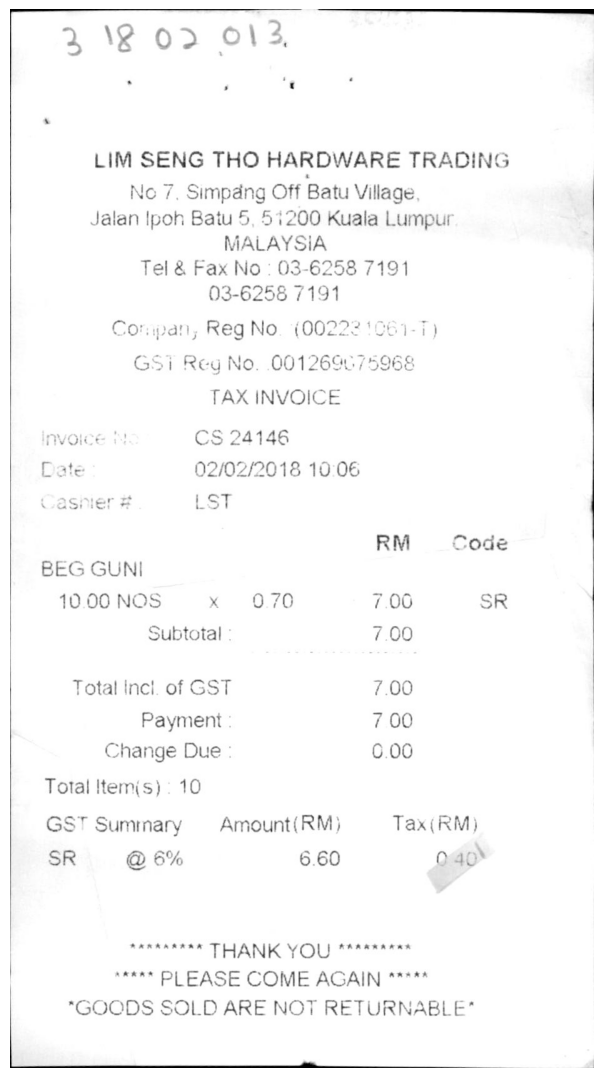

In [19]:
display(image_file)

### Binarization

In [20]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [21]:
gray_image = grayscale(img)
cv2.imwrite("temp/gray.jpg", gray_image)

True

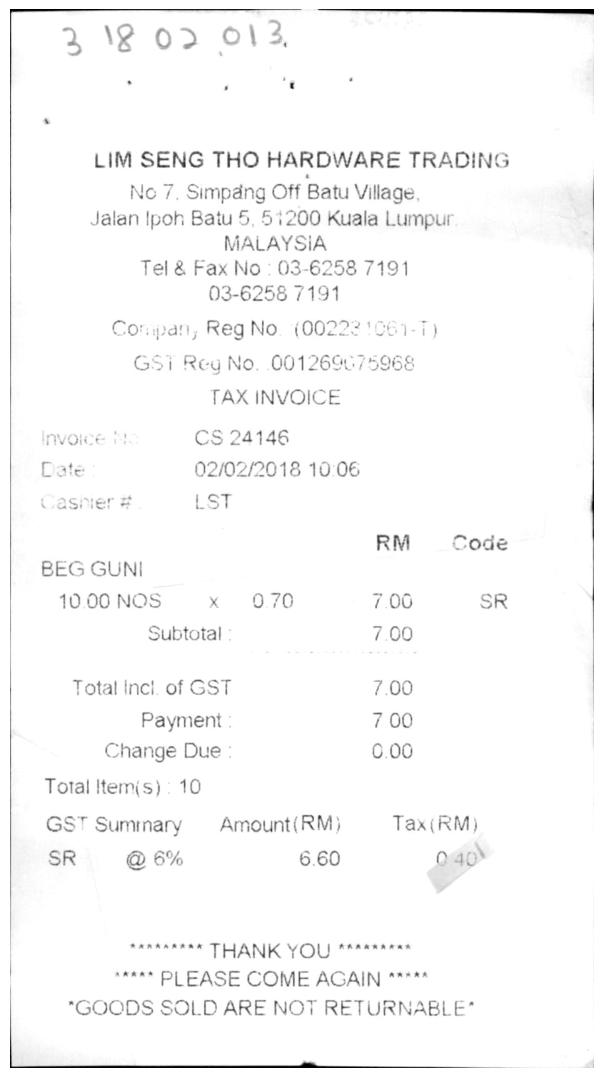

In [22]:
display("temp/gray.jpg")

### Noise Removal

In [23]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [24]:
no_noise = noise_removal(gray_image)
cv2.imwrite("temp/no_noise.jpg", no_noise)

True

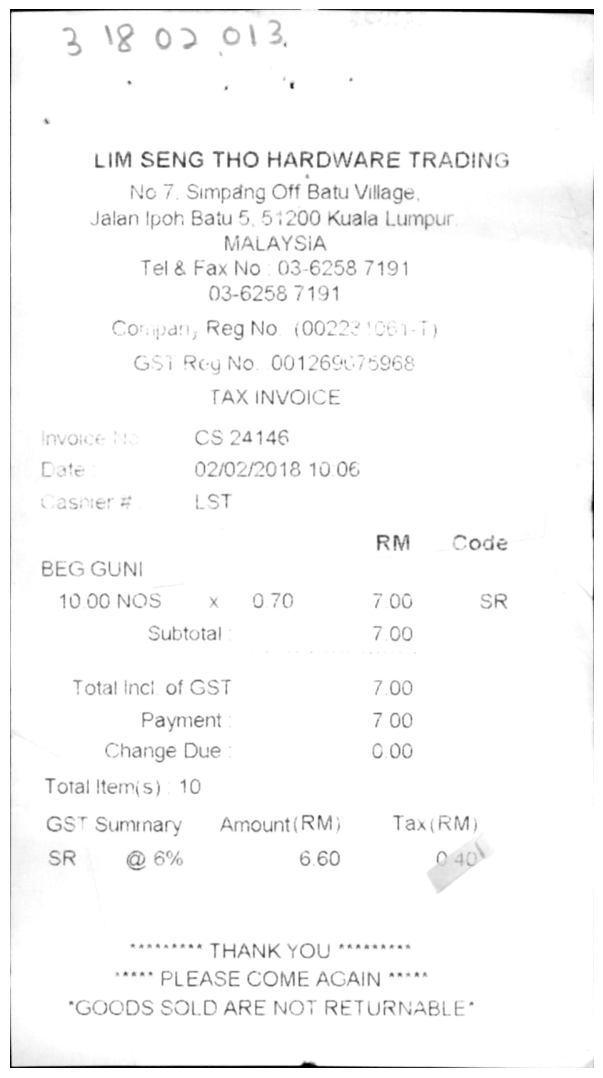

In [25]:
display("temp/no_noise.jpg")

### Dilation and Erosion

In [26]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [27]:
eroded_image = thin_font(no_noise)
cv2.imwrite("temp/eroded_image.jpg", eroded_image)

True

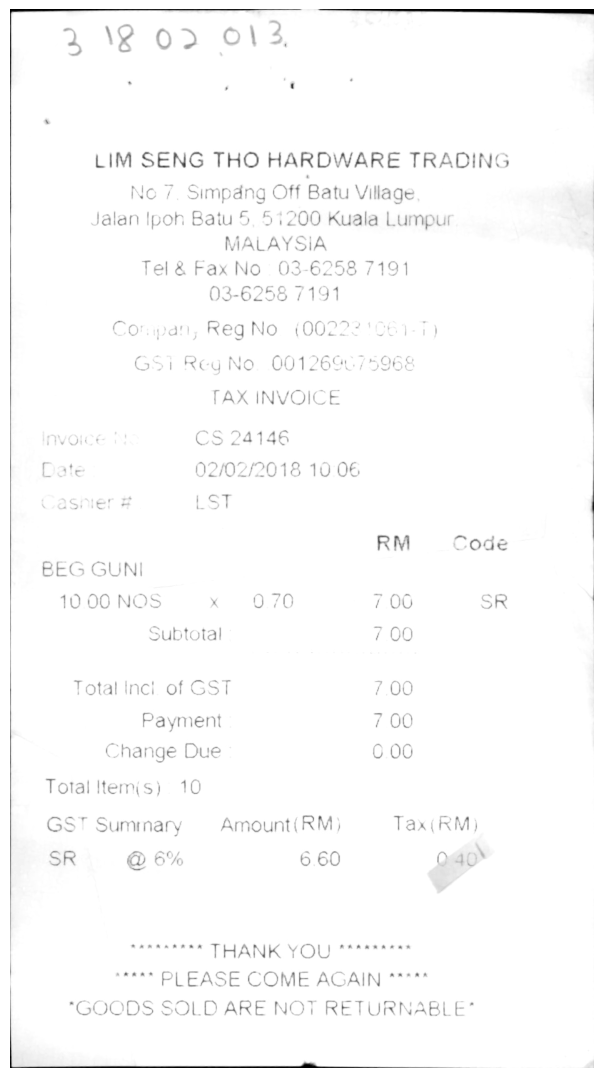

In [28]:
display("temp/eroded_image.jpg")

## OCR

In [29]:
image_preprocessed = "temp/eroded_image.jpg"
img = Image.open(image_preprocessed)

In [30]:
ocr_result = pytesseract.image_to_string(img)

In [31]:
print (ocr_result)

24 \2 0d oO \ 3.

LIM SENG THO HARDWARE TRADING
No 7. Simpdng Off Batu Village
Jalan Ipoh Batu 5, 51200 Kuala Lumpur
MALAYSIA
Tel & Fax No 03-6258 7191
03-6256 7191

Corpan, RegNo (0022?

GSi Reg No 00126007"
TAX INVOICE
Voice CS 24146
Date 02/02/2018 10 06
shier # LST
RM Code
BEG GUNI
1000 NOS x 070 700 SR
Subtotal 700
Total Incl of GST 7.00
Payment 7 00
Change Due 0 00
Total Item(s) 10
GST Suminary = Amount(RM) Tax(RM)
SR @ 6% 6.60 O@o™
foreskin “THANK YOU "testes
eens PLEASE COME AGAIN *****

“GOODS SOLD ARE NOT RETURNABLE’




In [32]:
hsoooonefehjfw.head()

NameError: name 'hsoooonefehjfw' is not defined

## Extract Entities from the text 

In [ ]:
!pip install --upgrade spacy[cuda111,transformers]

zsh:1: no matches found: spacy[cuda111,transformers]


In [ ]:
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm

!wget https://andrewhalterman.com/files/cleaned_masdar.jsonl

     ━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/587.7 MB 1.3 MB/s eta 0:04:43^C
     ━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/587.7 MB 1.3 MB/s eta 0:04:43
ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.3 MB/s eta 0:00:0000:0100:01


In [ ]:
!pip install jsonlines

In [ ]:
!paython -m spacy info
!python -m spacy validate

zsh:1: command not found: paython
✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.6.1) =================
ℹ spaCy installation:
/Users/aithassouneyouness/anaconda3/lib/python3.11/site-packages/spacy

NAME             SPACY            VERSION                            
en_core_web_lg   >=3.6.0,<3.7.0   3.6.0   ✔
en_core_web_sm   >=3.6.0,<3.7.0   3.6.0   ✔



In [ ]:
import spacy
from spacy import displacy


In [ ]:
nlp = spacy.load("en_core_web_lg")
nlp_sm = spacy.load("en_core_web_sm")

In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
doc = nlp(ocr_result)
for ent in doc.ents:
    print(ent.text,"|",ent.label_,"|",spacy.explain(ent.label_))

24 | CARDINAL | Numerals that do not fall under another type
\2 | GPE | Countries, cities, states
0d | CARDINAL | Numerals that do not fall under another type
3 | CARDINAL | Numerals that do not fall under another type
Simpdng Off Batu Village | PERSON | People, including fictional
Jalan Ipoh Batu 5 | FAC | Buildings, airports, highways, bridges, etc.
51200 | CARDINAL | Numerals that do not fall under another type
Kuala Lumpur | GPE | Countries, cities, states
MALAYSIA | GPE | Countries, cities, states
Tel & Fax | ORG | Companies, agencies, institutions, etc.
RegNo | ORG | Companies, agencies, institutions, etc.
0022 | DATE | Absolute or relative dates or periods
10 06 | DATE | Absolute or relative dates or periods
LST | ORG | Companies, agencies, institutions, etc.
RM Code
BEG GUNI
 | FAC | Buildings, airports, highways, bridges, etc.
1000 | CARDINAL | Numerals that do not fall under another type
NOS | ORG | Companies, agencies, institutions, etc.
070 | CARDINAL | Numerals that do not

In [ ]:
displacy.render(doc, style="ent")